---
title: "Finding Weird Data - Spotting Outliers"
format: live-html
sidebar: module-1
---

## What Are Outliers?

**Outliers** are data points that are very different from the rest of your data. They're the "weird" numbers that don't fit the pattern.

**Example:** pH readings from a creek: **7.1, 7.2, 7.0, 7.1, 12.3, 7.2**

That 12.3 is an outlier! It's way higher than everything else.

## Why Do Outliers Happen?

Outliers can happen for different reasons:

### 1. **Sensor Malfunction** 🔧
- The sensor glitched or needs calibration
- Battery was dying
- Sensor got knocked around

### 2. **Real Pollution Event** 🚨
- Factory dumped chemicals into the stream
- Farm fertilizer washed in after a storm
- Sewage spill

### 3. **Natural Event** 🌧️
- Heavy rain changed water chemistry
- Algae bloom
- Seasonal variation

**Your job as a scientist:** Figure out which reason it is!

## Why Outliers Matter for Water Quality

Outliers are REALLY important because:

1. **They might be pollution!** That weird high nitrate reading could mean someone dumped something bad
2. **They mess up your statistics** - Remember how the mean got messed up?
3. **They could mean broken equipment** - Your sensor might need fixing
4. **They tell a story** - What happened that day?

## Let's Spot Some Outliers!

Here's a simple way to spot outliers by looking at the data:

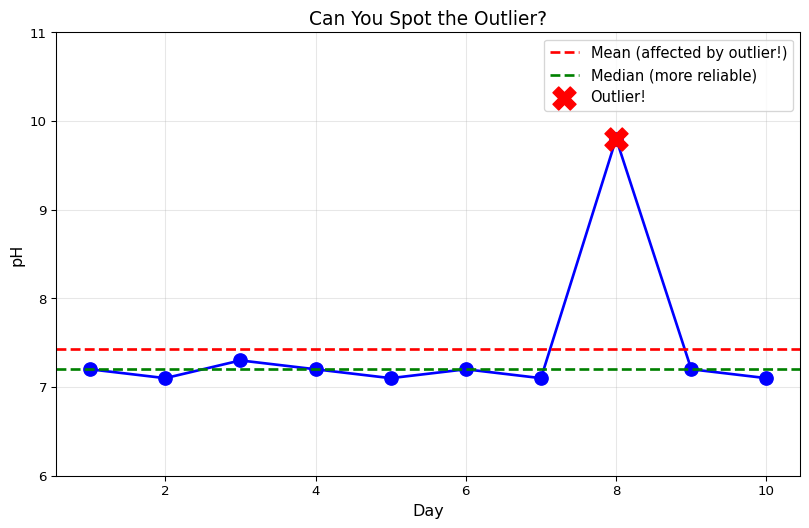

pH readings: [7.2, 7.1, 7.3, 7.2, 7.1, 7.2, 7.1, 9.8, 7.2, 7.1]
Mean: 7.43 (pulled up by outlier)
Median: 7.20 (not affected)

Day 8 is definitely weird! Something happened that day.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example: pH readings from a stream over 10 days
# Most are normal, but Day 8 looks weird!
days = list(range(1, 11))
ph_readings = [7.2, 7.1, 7.3, 7.2, 7.1, 7.2, 7.1, 9.8, 7.2, 7.1]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(days, ph_readings, marker='o', markersize=10, linewidth=2, color='blue')
plt.axhline(y=np.mean(ph_readings), color='red', linestyle='--', linewidth=2, label='Mean (affected by outlier!)')
plt.axhline(y=np.median(ph_readings), color='green', linestyle='--', linewidth=2, label='Median (more reliable)')

# Mark the outlier
plt.scatter([8], [9.8], s=300, color='red', marker='X', zorder=5, label='Outlier!')

plt.xlabel('Day', fontsize=12)
plt.ylabel('pH', fontsize=12)
plt.title('Can You Spot the Outlier?', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim(6, 11)
plt.show()

print("pH readings:", ph_readings)
print(f"Mean: {np.mean(ph_readings):.2f} (pulled up by outlier)")
print(f"Median: {np.median(ph_readings):.2f} (not affected)")
print("\nDay 8 is definitely weird! Something happened that day.")

## Method 1: The IQR Method (Interquartile Range)

This is a fancy way scientists detect outliers. Don't worry, it's easier than it sounds!

**The idea:** Most data should be in a certain range. If a number is way outside that range, it's an outlier.

**How it works:**
1. Find Q1 (25th percentile) - 25% of data is below this
2. Find Q3 (75th percentile) - 75% of data is below this
3. Calculate IQR = Q3 - Q1
4. Anything below Q1 - 1.5×IQR is an outlier
5. Anything above Q3 + 1.5×IQR is an outlier

**Don't memorize this! Python will do it for you.**

In [2]:
import numpy as np

# Example: Nitrate readings from a river
# One reading is suspiciously high!
nitrate = [2.1, 2.3, 2.2, 2.4, 2.2, 2.3, 15.0, 2.1, 2.2]

# Calculate IQR
q1 = np.percentile(nitrate, 25)  # 25th percentile
q3 = np.percentile(nitrate, 75)  # 75th percentile
iqr = q3 - q1

# Calculate outlier boundaries
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Nitrate readings (mg/L):", nitrate)
print(f"\nQ1 (25th percentile): {q1:.2f}")
print(f"Q3 (75th percentile): {q3:.2f}")
print(f"IQR: {iqr:.2f}")
print(f"\nOutlier boundaries:")
print(f"  Lower bound: {lower_bound:.2f}")
print(f"  Upper bound: {upper_bound:.2f}")

# Find the outliers
outliers = [x for x in nitrate if x < lower_bound or x > upper_bound]
print(f"\nOutliers detected: {outliers}")

Nitrate readings (mg/L): [2.1, 2.3, 2.2, 2.4, 2.2, 2.3, 15.0, 2.1, 2.2]

Q1 (25th percentile): 2.20
Q3 (75th percentile): 2.30
IQR: 0.10

Outlier boundaries:
  Lower bound: 2.05
  Upper bound: 2.45

Outliers detected: [15.0]


## Visualizing Outliers with a Box Plot

A **box plot** is a graph that shows outliers automatically! It's like a detective tool for finding weird data.

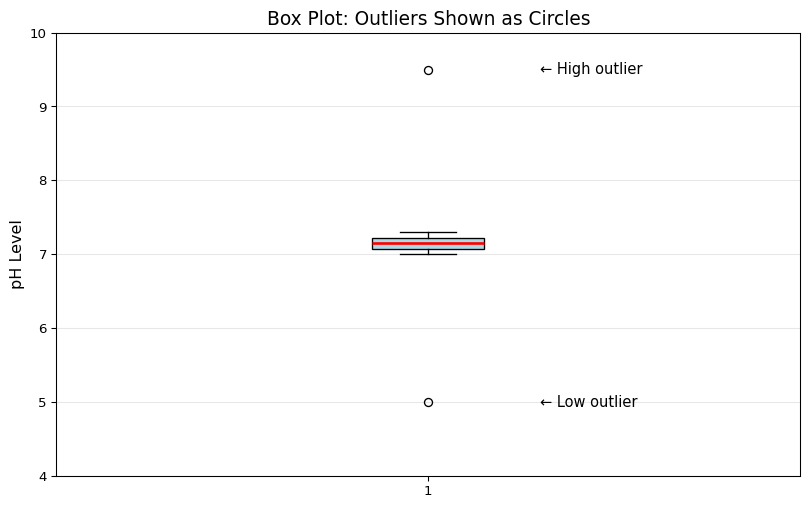

The circles show outliers!
The box shows where most of the 'normal' data is.


In [3]:
import matplotlib.pyplot as plt

# Example: pH readings with some outliers
ph_data = [7.1, 7.2, 7.0, 7.3, 7.2, 7.1, 9.5, 7.2, 7.1, 7.0, 5.0, 7.3]

plt.figure(figsize=(10, 6))
plt.boxplot(ph_data, vert=True, patch_artist=True, 
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel('pH Level', fontsize=12)
plt.title('Box Plot: Outliers Shown as Circles', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(4, 10)

plt.text(1.15, 9.5, '← High outlier', fontsize=11, va='center')
plt.text(1.15, 5.0, '← Low outlier', fontsize=11, va='center')

plt.show()

print("The circles show outliers!")
print("The box shows where most of the 'normal' data is.")

**Reading a box plot:**
- The **line in the middle** = Median
- The **box** = Where the middle 50% of data is
- The **whiskers** (lines extending out) = Normal range
- The **circles** = Outliers!

## Try It: Detect Outliers
```{pyodide}
import numpy as np
import matplotlib.pyplot as plt

# Example: You're analyzing nitrate from a creek
# Is there an outlier?
creek_nitrate = [3.1, 3.2, 3.0, 3.3, 18.5, 3.1, 3.2, 3.0]

# Calculate IQR method
q1 = np.percentile(creek_nitrate, 25)
q3 = np.percentile(creek_nitrate, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Nitrate readings:", creek_nitrate)
print(f"\nOutlier boundaries: {lower_bound:.2f} to {upper_bound:.2f}")

# Find outliers
outliers = [x for x in creek_nitrate if x < lower_bound or x > upper_bound]
print(f"Outliers found: {outliers}")

# Make a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(creek_nitrate, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen'))
plt.ylabel('Nitrate (mg/L)', fontsize=12)
plt.title('Box Plot of Creek Nitrate', fontsize=13)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

# Try removing the 18.5 and run it again!
```

## What Should You Do with Outliers?

Once you find an outlier, you have some choices:

### Option 1: Keep It ✅
**When to do this:**
- It's a real measurement (like a pollution event)
- You want to study what caused it
- It's important for your research

In [4]:
# Example: Keep the outlier because it's a real pollution event
data_with_outlier = [2.1, 2.3, 2.2, 15.0, 2.4, 2.2]
print("Data with outlier:", data_with_outlier)
print(f"Mean: {np.mean(data_with_outlier):.2f}")
print("\nWe keep it because it shows a pollution event happened!")

Data with outlier: [2.1, 2.3, 2.2, 15.0, 2.4, 2.2]
Mean: 4.37

We keep it because it shows a pollution event happened!


### Option 2: Remove It 🗑️
**When to do this:**
- It's clearly a sensor error
- It's impossible (like pH of 20)
- You want to see typical conditions

In [5]:
# Example: Remove the outlier because it's a sensor error
data_with_outlier = [7.1, 7.2, 7.0, 15.0, 7.2, 7.1]
data_cleaned = [x for x in data_with_outlier if x < 10]  # Remove anything above 10

print("Original data:", data_with_outlier)
print("Cleaned data:", data_cleaned)
print(f"\nMean before: {np.mean(data_with_outlier):.2f}")
print(f"Mean after: {np.mean(data_cleaned):.2f}")
print("\nMuch better! Now the mean makes sense.")

Original data: [7.1, 7.2, 7.0, 15.0, 7.2, 7.1]
Cleaned data: [7.1, 7.2, 7.0, 7.2, 7.1]

Mean before: 8.43
Mean after: 7.12

Much better! Now the mean makes sense.


### Option 3: Investigate It 🔍
**Always do this first!**
- Check your field notes - What happened that day?
- Look at weather data - Was there a storm?
- Check the sensor - Is it working correctly?
- Ask: Is this reading even possible?

## Real-World Detective Work

Let's practice being water quality detectives!

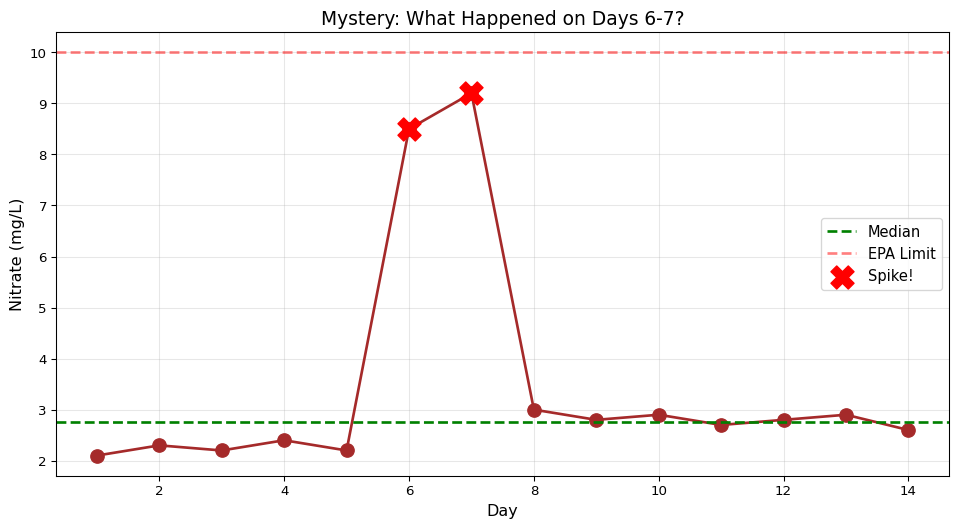

Detective Questions:
1. Are Days 6-7 outliers? (YES - much higher than others)
2. Are they sensor errors? (Probably NOT - both days show high values)
3. What could cause this? (Possible: Heavy rain → fertilizer runoff)
4. Should we remove them? (NO - this is real data showing an event!)

Conclusion: This looks like a real pollution event to investigate!


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Scenario: You're monitoring a stream near a farm
# Here are nitrate readings over 2 weeks
days = list(range(1, 15))
nitrate = [2.1, 2.3, 2.2, 2.4, 2.2, 8.5, 9.2, 3.0, 2.8, 2.9, 2.7, 2.8, 2.9, 2.6]

# Plot it
plt.figure(figsize=(12, 6))
plt.plot(days, nitrate, marker='o', markersize=10, linewidth=2, color='brown')
plt.axhline(y=np.median(nitrate), color='green', linestyle='--', linewidth=2, label='Median')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, alpha=0.5, label='EPA Limit')

# Highlight the spike
plt.scatter([6, 7], [8.5, 9.2], s=300, color='red', marker='X', zorder=5, label='Spike!')

plt.xlabel('Day', fontsize=12)
plt.ylabel('Nitrate (mg/L)', fontsize=12)
plt.title('Mystery: What Happened on Days 6-7?', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print("Detective Questions:")
print("1. Are Days 6-7 outliers? (YES - much higher than others)")
print("2. Are they sensor errors? (Probably NOT - both days show high values)")
print("3. What could cause this? (Possible: Heavy rain → fertilizer runoff)")
print("4. Should we remove them? (NO - this is real data showing an event!)")
print("\nConclusion: This looks like a real pollution event to investigate!")

## Comparing With and Without Outliers

In [7]:
import numpy as np

# Example: Creek pH data with one bad sensor reading
creek_ph = [7.1, 7.2, 7.0, 7.2, 14.5, 7.1, 7.2]

# Calculate statistics both ways
print("WITH the outlier (14.5):")
print(f"  Mean: {np.mean(creek_ph):.2f}")
print(f"  Median: {np.median(creek_ph):.2f}")
print(f"  Standard Deviation: {np.std(creek_ph):.2f}")

# Remove the outlier (14.5 is impossible for creek water)
creek_ph_clean = [x for x in creek_ph if x < 10]

print("\nWITHOUT the outlier:")
print(f"  Mean: {np.mean(creek_ph_clean):.2f}")
print(f"  Median: {np.median(creek_ph_clean):.2f}")
print(f"  Standard Deviation: {np.std(creek_ph_clean):.2f}")

print("\nSee how much more accurate the statistics are without the bad reading?")

WITH the outlier (14.5):
  Mean: 8.19
  Median: 7.20
  Standard Deviation: 2.58

WITHOUT the outlier:
  Mean: 7.13
  Median: 7.15
  Standard Deviation: 0.07

See how much more accurate the statistics are without the bad reading?


## Your Future: Outliers in Buoy Data

When you deploy sensor buoys in real streams, you'll see outliers! Some will be:

**Real events to study:**
- 🌧️ Storm runoff events
- 🏭 Pollution spills
- 🦠 Algae blooms
- 🌊 Seasonal changes

**Equipment issues to fix:**
- 🔋 Low battery
- 🔧 Sensor needs calibration
- 📡 Data transmission errors
- 🐟 Something bumped the sensor

The skills you're learning now will help you tell the difference!

## Quick Reference: Finding Outliers
```python
# IQR Method (copy this code!)
import numpy as np

data = [your_readings_here]

# Calculate boundaries
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Find outliers
outliers = [x for x in data if x < lower or x > upper]
print("Outliers:", outliers)
```

## Try It: Multiple Outliers
```{pyodide}
import numpy as np
import matplotlib.pyplot as plt

# Example: pH readings with several outliers
ph_readings = [7.1, 7.2, 7.0, 9.5, 7.2, 7.1, 5.5, 7.3, 7.2, 7.1, 12.0, 7.2]

# Make a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(ph_readings, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightcoral'))
plt.ylabel('pH', fontsize=12)
plt.title('How Many Outliers Can You Spot?', fontsize=13)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

# Calculate IQR method
q1 = np.percentile(ph_readings, 25)
q3 = np.percentile(ph_readings, 75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = [x for x in ph_readings if x < lower or x > upper]

print("pH readings:", ph_readings)
print(f"Outliers detected: {outliers}")
print("\nWhat do you think caused each outlier?")
```

## Key Takeaways

- 🔍 **Outliers** = Data points that don't fit the pattern
- ⚠️ They could mean: pollution events, sensor errors, or data mistakes
- 📊 **IQR method** = Math way to find outliers automatically
- 📉 **Box plots** = Visual way to spot outliers (shown as circles)
- 🤔 Always **investigate** before removing outliers
- ✅ Keep outliers if they're real events worth studying
- 🗑️ Remove outliers if they're equipment errors
- 🌊 Real stream data will have outliers - you need to understand them!

## The Decision Tree

When you find an outlier, ask yourself:

1. **Is it possible?** (pH of 20 = No, pH of 8.5 = Yes)
2. **What happened that day?** (Check notes, weather, etc.)
3. **Does it fit a pattern?** (One spike vs multiple high readings)
4. **Is the sensor working?** (Check calibration, battery)

Then decide: Keep it, remove it, or investigate more!

**Next lesson:** We'll learn about scatterplots - how to see if two things (like pH and nitrate) are related!